## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='inner', on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

#find all mouse IDs, drop duplicates
unique_mice_id = combined_data.drop_duplicates(subset="Mouse ID", keep="first")

#count mouse IDs
number_of_mice = unique_mice_id['Mouse ID'].count()

#print to screen
f"Number of Mice: {number_of_mice}"

'Number of Mice: 249'

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#new DF, clone the combined_data DF
find_dups = pd.DataFrame()
find_dups = combined_data

#find all duplicated Timepoints by Mouse ID
find_dups = find_dups[find_dups.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]

#save to a list
list_of_dup_ids = []
list_of_dup_ids = find_dups["Mouse ID"].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

#print the DF from previous section to screen
find_dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#create a new DF, clone data
cleaned_data = pd.DataFrame()
cleaned_data = combined_data

#create a new column of boolean values, if the 'corrupt' Mouse ID is found, apply a true value
cleaned_data["to_remove"] = np.where((cleaned_data["Mouse ID"].isin(list_of_dup_ids)), True, False)

#remove rows where to_remove is true
cleaned_data.drop(cleaned_data.loc[cleaned_data["to_remove"]==True].index, inplace=True)

#deleting our 'to_remove' column because it's no longer needed
del cleaned_data["to_remove"]

#print to screen
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

#find all mouse IDs, drop duplicates
unique_mice_id2 = cleaned_data.drop_duplicates(subset="Mouse ID", keep="first")

#count mouse IDs
number_of_mice2 = unique_mice_id2['Mouse ID'].count()

#print to screen
f"Number of Mice: {number_of_mice2}"

'Number of Mice: 248'

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#create a list with the categories we need
selected_data = ["Drug Regimen", "Tumor Volume (mm3)"]

#copy our data to a new "slim data" DF
slim_data = cleaned_data[selected_data]

# a new DF
summary_stats_1 = pd.DataFrame()

# pull from each groupby creating mulitple series, and applying it to the new blank DF
mean_data = slim_data.groupby(["Drug Regimen"]).mean()
summary_stats_1["Mean"] = mean_data["Tumor Volume (mm3)"]

median_data = slim_data.groupby(["Drug Regimen"]).median()
summary_stats_1["Median"] = median_data["Tumor Volume (mm3)"]

var_data = slim_data.groupby(["Drug Regimen"]).var()
summary_stats_1["Variance"] = var_data["Tumor Volume (mm3)"]

std_data = slim_data.groupby(["Drug Regimen"]).std()
summary_stats_1["Standard Deviation"] = std_data["Tumor Volume (mm3)"]

sem_data = slim_data.groupby(["Drug Regimen"]).sem()
summary_stats_1["SEM"] = sem_data["Tumor Volume (mm3)"]

#print to screen
summary_stats_1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

#new DF
summary_stats_2 = pd.DataFrame()

#groupby.agg for the requested data
summary_stats_2 = slim_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

#print to screen
summary_stats_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

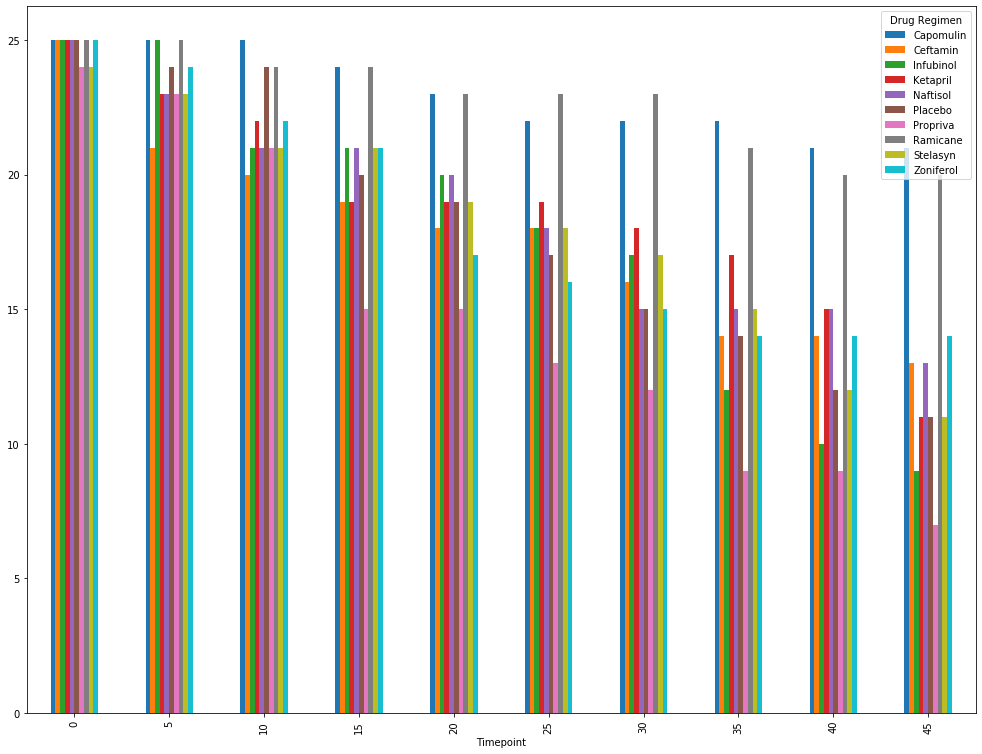

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#create a new DF
barplot_pd = pd.DataFrame()

#just the coulmns we need
trim_bar_data = ["Drug Regimen", "Mouse ID", "Timepoint"]

#trim the data down
barplot_pd = cleaned_data[trim_bar_data]

#drop them into a pivot table, then .plot
barplot_pd.pivot_table(index="Timepoint", columns="Drug Regimen", values="Mouse ID", aggfunc="count").plot(kind="bar", figsize=(17,13))

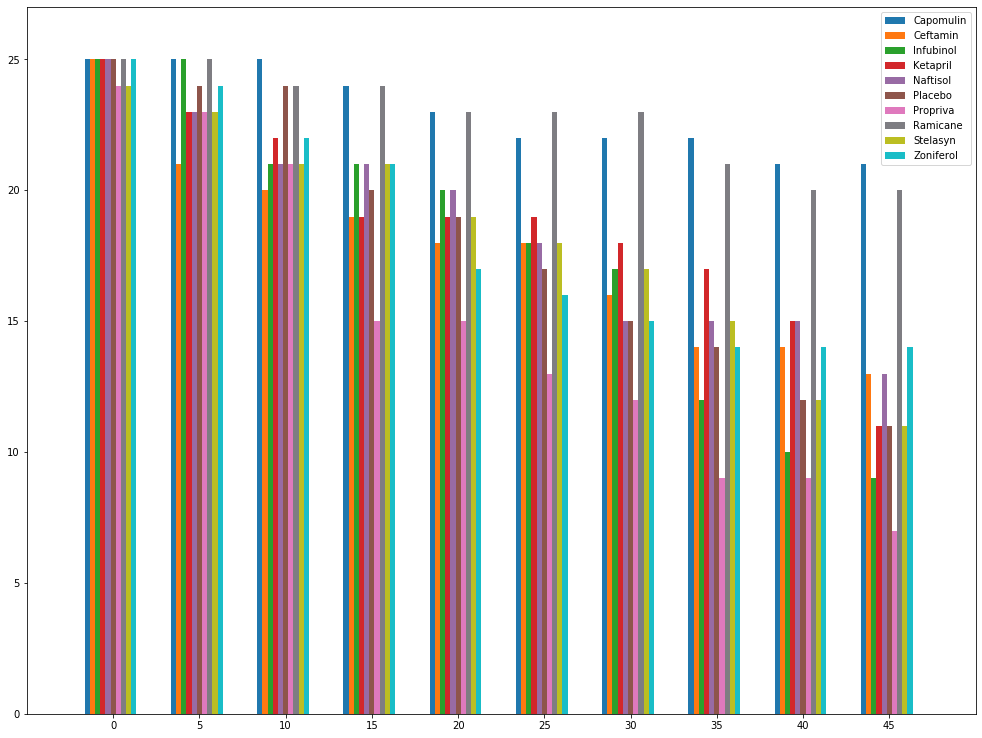

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#creat a new DF, trim down to the data we need
barplot_pd_2 = pd.DataFrame()
barplot_pd_2 = cleaned_data[trim_bar_data]

#set bar width
bar_width = 0.3

#get a list with all the timepoints
timepoint_scale = barplot_pd_2["Timepoint"].unique()

#a list of colors to match the pandas activity above
colors_list = ["#2078ae", "#ff7811", "#2aa02c", "#d2272a", "#986ba4", "#8e554b", "#df79bd", "#7e7d82", "#bbbe22", "#19bdc7"]

#create a list of drug names for creating our labels
array_of_drug_names = []
array_of_drug_names = barplot_pd_2["Drug Regimen"].unique()
array_of_drug_names.sort()

#set the number of drugs, for iterating through them all
num_of_drugs = barplot_pd_2["Drug Regimen"].nunique()

#set up the plot
fig, ax = plt.subplots(figsize=(17,13))

#setup the x and y axii
plt.xticks(timepoint_scale, timepoint_scale)
plt.yticks(np.arange(0,30,5))
ax.set_xlim([-5, 50])
ax.set_ylim([0, 27])

#group our data by timepoint / drug
barplot_pd_2 = barplot_pd_2.groupby(["Timepoint", "Drug Regimen"]).count()

#set up some values for iterating
l = 0
i = 0
j = -2
iterate_by = int(barplot_pd_2.count() / num_of_drugs)

#loop through the number of drugs
while l < len(array_of_drug_names):
    legend_keeper = 0
    j = .5 + (l * 0.3)
    i = l
    k = 0
    #loop through each time the drug appears in the data, creating a bar with the Mouse ID count, then looping to the next 
    while i < len(barplot_pd_2):
        ax.bar(j-2, barplot_pd_2.iloc[i], width=bar_width, color=colors_list[l], label=array_of_drug_names[l] if legend_keeper == 0 else "")
        j = j+5
        k = k+1
        #i = i+10
        i = i + iterate_by
        legend_keeper = 1
    l = l + 1

plt.legend(loc="upper right")

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

int

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
